# Table of Contents
* &nbsp;
	* [Synthesis of IIR filters by the bilinear transformation method](#Synthesis-of-IIR-filters-by-the-bilinear-transformation-method)
		* [The bilinear transform](#The-bilinear-transform)
		* [Synthesis of low-pass filters -- procedure](#Synthesis-of-low-pass-filters----procedure)
		* [Synthesis of other type of filters](#Synthesis-of-other-type-of-filters)
		* [Numerical results](#Numerical-results)


In [1]:
%run nbinit.ipy

... Configuring matplotlib formats
... Configuring matplotlib with inline figures
... Importing numpy as np, scipy as sp, pyplot as plt, scipy.stats as stats
   ... scipy.signal as sig
... Importing widgets, display, HTML, Image, Javascript
... Some LaTeX definitions


... Defining figures captions 


... Loading customized Javascript for interactive solutions (show/hide)
... Redefining interactive from ipywidgets


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
import seaborn as sns                 #this can be removed safely  if seaborn is not available
sns.mpl.rc("figure", figsize=(7,4))   #idem 

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Synthesis of IIR filters by the bilinear transformation method

A simple and effective method for designing IIR digital filters with prescribed
magnitude response specifications is the bilinear transformation method. The point is that already exists well-known optimal methods for the design of analog filters, such as Butterworth, Chebyshev, or elliptic filter designs. 
Then, the idea is to map the digital filter into an equivalent analog filter, which can be designed optimally, and map back the design to the digital domain. The key for this procedure is to dispose of a reversible mapping from the analog domain to the digital domain. 

### The bilinear transform

Recall that in the analog domain, the equivalent of the Z-transform is the [Laplace transform](http://en.wikipedia.org/wiki/Laplace_transform) which associates a signal $s(t)$ with a function $S(p)$ of the complex variable $p$. When $p$ lives on the imaginary axis of the complex plane, then the Laplace transform reduces to the Fourier transform (for causal signals). For transfer functions, stability is linked to the positions of poles in the complex plane. They must have a negative real part (that is belong to the left half plane) to ensure the stability of the underlying system. 

The formula for the bilinear transform comes from a formal analogy between the derivation operator in the Laplace and Z domains. 

The bilinear transform makes an association between  analog  and  digital frequencies, as follows:
\begin{equation}
\eqboxd{
\displaystyle{
p=k \frac{1-z^{-1}}{1+z^{-1}}}},
\label{eq:BLT}
\end{equation}
where $k$ is an arbitrary constant. The usual derivation leads to $k=2/T_s$, where  $T_s$ is the sampling period. However, using a general parameter $k$ does not change the methodology and offers a free parameter that enables to simplify the procedure. 

The  point is that this transform presents some interesting  and useful features:

 1. It preserves stability and minimum phase property (the zeros of the transfer function  are with negative real part (analog case) or are inside the unit circle (discrete case). 
 2. It maps the infinite analog axis into a periodic frequency axis in the frequency domain for discrete signals. That mapping is highly non linear and warp the frequency components, but it recovers the well-known property of periodicity of the Fourier transform of discrete signals. 
 
The corresponding mapping of frequencies is obtained as follows. Letting $p=j\omega_a=j2\pi f_a $ and $z=\exp(\omega_d)=\exp(j2\pi f_d)$. Plugging this in (\ref{eq:BLT}), we readily obtain
 \begin{equation}
 \eqboxc{\displaystyle{
 \omega_a=k \tan\left( \frac{\omega_d }{2}\right)}},
 \label{eq:prewarping}
 \end{equation}
 or
 \begin{equation}
 \eqboxc{\displaystyle{
 \omega_d=2 \arctan\left( \frac{\omega_a }{k}\right)}}.
 \label{eq:prewarping_b}
 \end{equation}
The transformation (\ref{eq:prewarping}) corresponds to the initial transform of the specifications in the digital domain into analog domain specifications. It is often called a *pre-warping* . Figure \ref{fig:BLT} shows the mapping of pulsations from one domain into the other one.

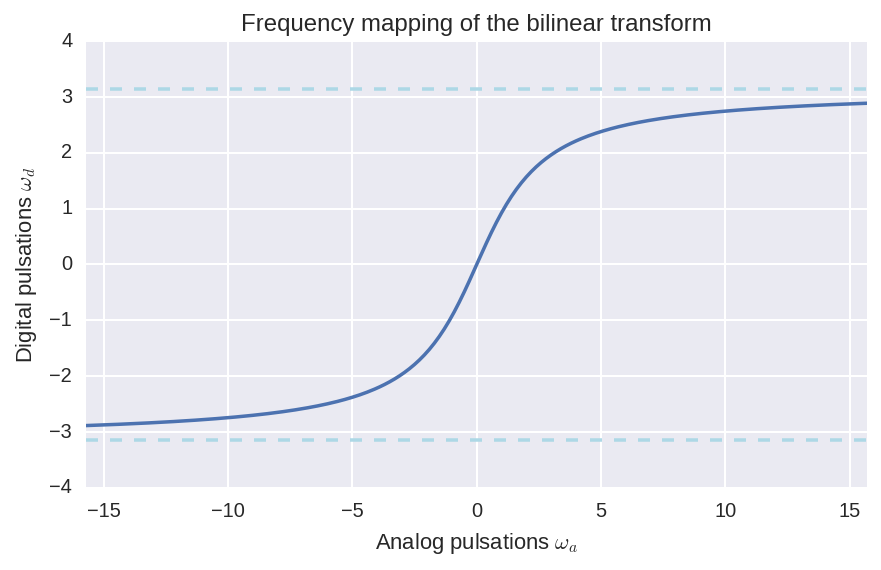

In [4]:
k=2; xmin=-5*pi; xmax=-xmin
omegaa=np.arange(xmin, xmax,0.1)
omegad=2*np.arctan(omegaa/k)
plt.plot(omegaa,omegad)
plt.plot([xmin, xmax],[-pi, -pi],'--', color='lightblue')
plt.plot([xmin, xmax],[pi, pi],'--', color='lightblue')
#plt.text(-3.7,0.4,'Fs/2', color='blue',fontsize=14)
plt.xlabel("Analog pulsations $\omega_a$")
plt.ylabel("Digital pulsations $\omega_d$")
_=plt.xlim([xmin, xmax])
plt.title("Frequency mapping of the bilinear transform")
figcaption("Frequency mapping of the bilinear transform", label="fig:BLT")

When designing a digital filter using an analog approximation and the bilinear transform, we follow these steps:
Pre-warp the cutoff frequencies
Design the necessary analog filter
apply the bilinear transform to the transfer function
Normalize the resultant transfer function to be monotonic and have a unity passband gain (0dB).

### Synthesis of low-pass filters -- procedure

Let $\omega_p$ and $\omega_s$ denote the edges of the pass-band and of the stop-band. 

1. For the synthesis of the analog filter, it is convenient to work with a normalized filter such that $\Omega_p=1$. Therefore, as a first step, we set 
$$
k = \arctan(\omega_p/2)
$$
which ensures that $\Omega_p=1$. Then, we compute $\Omega_s=2 \arctan\left( \omega_s /k\right)$.

2. Synthetize the optimum filter in the analog domain, given the type of filter, the frequency and gain constraints. This usually consists in determining the order of the filter such that the gain constraints (ripples, minimum attenuation, etc) are satisfied, and then select the corresponding polynomial. This yields a transfer function $H_a(p)$.

3. Map back the results to the digital domain, using the bilinear transform (\ref{eq:BLT}), that is compute
$$
\eqboxc{\displaystyle{
H(z) = \left. H_a(p) \right|_{p=k \frac{1-z^{-1}}{1+z^{-1}}}}}
$$


\begin{exercise}
We want to synthetize a digital filter with $f_p=6kHz$, with a maximum attenuation of -3dB, and a stop-band frequency of $f_s=9kHz$, with a minimum attenuation of -9dB. The Nyquist rate (sampling frequency) is $F_s=36kHz$. 

- Represent the template for this sythesis,
- Compute the pulsations in the analog domain (fix $\Omega_p=1$).
- if we choose a Butterworth filter, the best order is $n=2$ and the corresponding polynomial is $D(p)=p^2+\sqrt{2}p+1$, and the transfer function is $H_a(p)=1/D(p)$. Compute $H(z)$. 
- Plot $H(f)$. Use `sig.freqz` for computing the transfer function. We also provide a function `plt_LPtemplate(omega, A, Abounds=None)` which displays the template of the filter. Import it using `from plt_LPtemplate import *`.
\end{exercise}

**Elements of solution** 
 
 -  $k=1/\tan(\pi/6)=\sqrt{3}$
 - $\Omega_s = k \tan(\pi/4) = \sqrt{3}$ 
 - $$
 H(z) = \frac{1+2z^{-1}+z^{-2}}{(4+\sqrt{6})-4 z^{-1} + (4-\sqrt{6})z^{-2}}
 $$

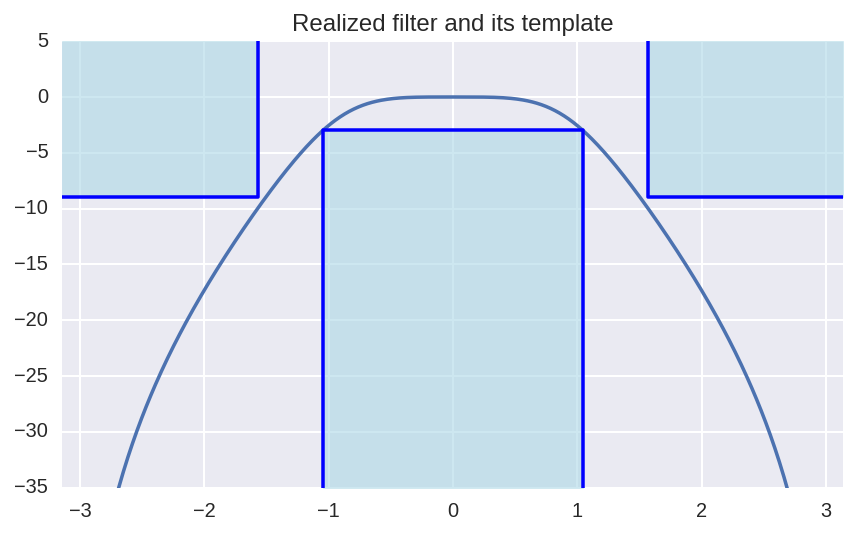

In [5]:
# compute the transfer function using freqz 
w,H = sig.freqz([1, 2, 1],[4+sqrt(6), -4, 4-sqrt(6)], whole=True)
# plot the result --w-pi corresponds to a shift of the pulsation 
#axis associated with the fftshift of the transfer function. 
plt.plot(w-pi, 20*np.log10(fftshift(np.abs(H))))
# plot the filter template
from plt_LPtemplate import *
plt_LPtemplate([pi/3, pi/2],[-3, -9],Abounds=[5, -35])
plt.title("Realized filter and its template")
figcaption("Realized filter and its template")

In practice, the transfer function can be generated by transforming the poles and zeros of the analog filter into the poles and zeros of the digital filter. This is simply done using the transformation
$$
z=\frac{1+p/k}{1-p/k}.
$$
It remains a global gain that can be fixed using a value at $H(1)$ ($\omega=0)$.This dramatically simplifies the synthesis in practice.


### Synthesis of other type of filters

For other kind of filters (namely band-pass, high-pass, band-stop), we can either: 
 - use the bilinear transform and the pre-warping to obtain a filter of the same type in the analog domain; then transferring the problem to the analog designer. 
 - use an auxiliary transform that converts a digital low-pass filter into another type of filter. 
Using the second option, we see that the low-pass synthesis procedure has to be completed with

0. Transform the specifications of the digital filter into specifications for a low-pass digital filter.  

#### Transposition from a low-pass filter ($\omega_p$) to another type
Let $\omega_1$ and $\omega_2$ denote the low and high cut-off frequencies (only $\omega_1$ for the transposition of a low-pass into a high-pass). These transformations preserve the unit circle. That is, $z=e^{j\theta}$ is transformed into $z=e^{j\theta'}$. There is an additional frequency warping, but the notion of frequency is preserved.
1. **low-pass $\omega_p$-- low-pass $\omega_1$**
$$
z^{-1} \rightarrow \frac{z^{-1}-\alpha}{1-\alpha z^{-1}}
$$
with
$$
\alpha=\frac{\sin\left(\frac{\omega_p-\omega_1}{2}\right)}{\sin\left(\frac{\omega_p+\omega_1}{2}\right)}
$$

3. **low-pass $\omega_p$-- band-pass $\omega_1, \omega_2 $**
$$
z^{-1} \rightarrow - \frac
{z^{-2}-\frac{2\alpha \beta}{\beta+1} z^{-1} + \frac{\beta-1}{\beta+1}}
{\frac{\beta-1}{\beta+1}z^{-2} -\frac{2\alpha \beta}{\beta+1} z^{-1} + 1}
$$
with
$$
\alpha=\frac{\cos\left(\frac{\omega_p+\omega_1}{2}\right)}{\cos\left(\frac{\omega_p-\omega_1}{2}\right)}
$$
and
$$
\beta=\tan\left(\frac{\omega_p}{2}\right)\tan\left(\frac{\omega_2-\omega_1}{2}\right)
$$

\begin{exercise}
We want to synthetize an high-pass digital filter with edge frequencies $2, 4, 12$ and $14$ kHz,  with a maximum attenuation of 3dB in the band-pass, and a minimum attenuation of -12dB in the  stop-band. The Nyquist rate (sampling frequency) is $F_s=32kHz$. 

- Represent the template for this sythesis,
- Compute the pulsations in the analog domain (fix $\Omega_p=1$).
- if we choose a Butterworth filter, the best order is $n=2$ and the corresponding polynomial is $D(p)=p^2+\sqrt{2}p+1$, and the transfer function is $H_a(p)=1/D(p)$. Compute $H(z)$. 
- Plot $H(f)$. Use `sig.freqz` for computing the transfer function. 
\end{exercise}

** Sketch of solution**
- normalized pulsations: $\omega_0=\frac{\pi}{8}, \omega_1=\frac{\pi}{4}, \omega_2=\frac{3\pi}{4}, \omega_3=\frac{7\pi}{8}$
- transposition into a digital low-pass $\alpha=0, \beta=\tan(\omega_p/2)$. Choosing $\beta=1$, we get $\omega_p=\pi/2$
- the transform is thus $z^{-1} \rightarrow -z^{-2}$
- In the BLT, we take $k=1$; thus $\omega_s=1$ and $\omega_s=\tan(3\pi/8)$
- Finally, we obtain
$$
 H(z) = \frac{1+2z^{-1}+z^{-2}}{(2+\sqrt{2}) + (2-\sqrt{2})z^{-2}}
 $$
 for the digital low-pass, which after  the transform  $z^{-1} \rightarrow -z^{-2}$ gives
$$
 H(z) = \frac{1-2z^{-2}+z^{-4}}{(2+\sqrt{2}) + (2-\sqrt{2})z^{-4}}
$$

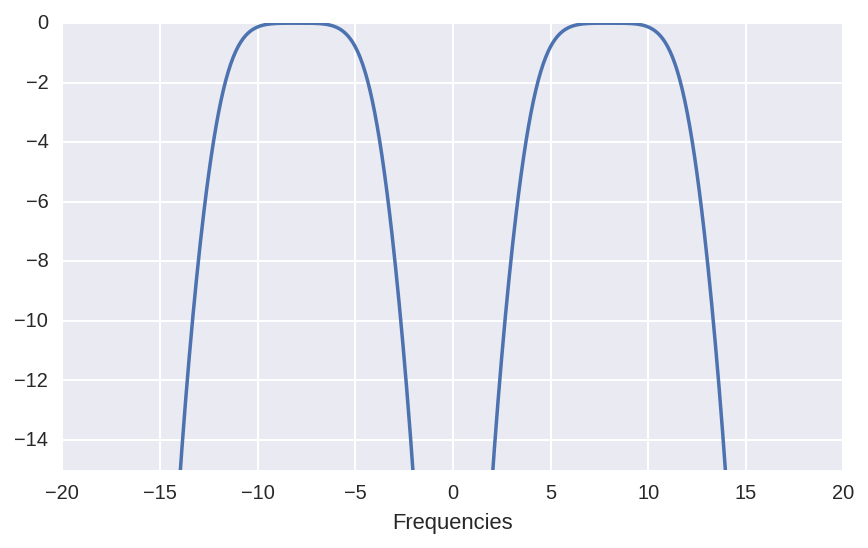

In [6]:
# compute the transfer function using freqz 
w,H = sig.freqz([1, 0, -2, 0, 1],[2+sqrt(2), 0, 0, 0, 2-sqrt(2)], whole=True)
# plot the result --w-pi corresponds to a shift of the pulsation 
#axis associated with the fftshift of the transfer function. 
plt.plot((w-pi)/(2*pi)*32, 20*np.log10(fftshift(np.abs(H))))
plt.xlabel("Frequencies")
_=plt.ylim([-15, 0])


### Numerical results

Finally, we point out that these procedures have been systematized into computer programs. Two functions are available in scipy to design an IIR filter: `sig.iirfilter` that computes the coefficients of a filter for a given order, and  `sig.iirdesign` that even determine a correct order given constraint on maximum and/or minimum attenuation. It is instructive to consult the help of these functions (e.g. `help(sig.iirdesign)`) and try to reproduce the results we obtained analytically above. Possible solutions are provided below.

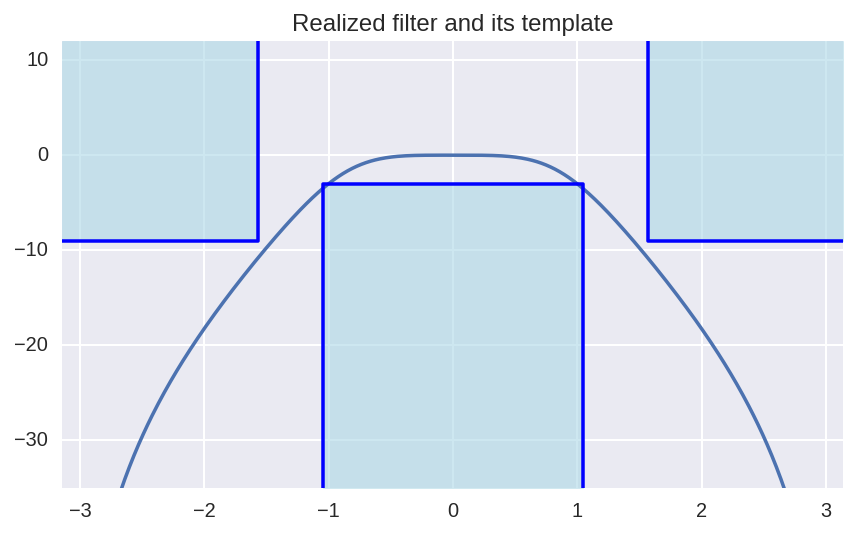

In [7]:
b,a= sig.iirfilter(2, [1/(pi)], rp=None, rs=None, btype='lowpass', analog=False, ftype='butter', output='ba')
# compute the ttransfer function using freqz 
w,H = sig.freqz(b,a, whole=True)
# plot the result --w-pi corresponds to a shift of the pulsation 
#axis associated with the fftshift of the transfer function. 
plt.plot(w-pi, 20*np.log10(fftshift(np.abs(H))))
# plot the filter template
from plt_LPtemplate import *
plt_LPtemplate([pi/3, pi/2],[-3, -9],Abounds=[12, -35])
plt.title("Realized filter and its template")
figcaption("Realized filter and its template")

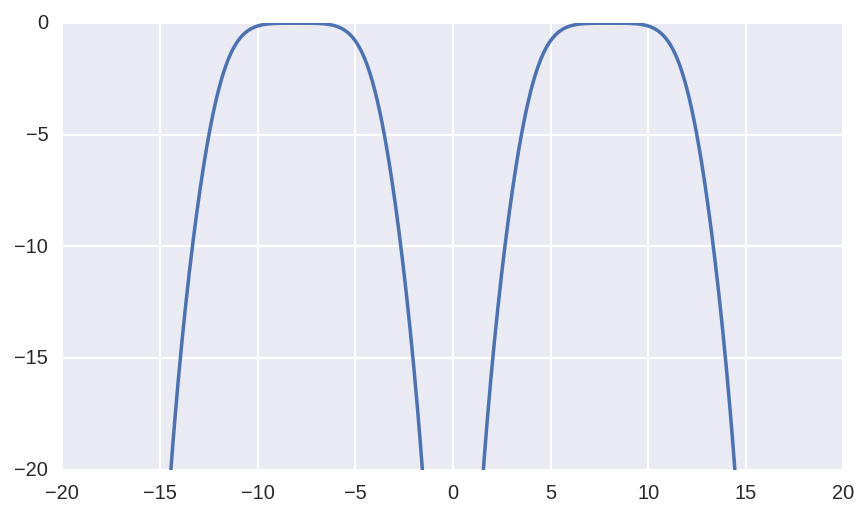

In [8]:
b,a= sig.iirdesign([4/16, 12/16], [2/16, 14/16], 3, 12, analog=False, 
                   ftype='butter', output='ba')
# compute the ttransfer function using freqz 
w,H = sig.freqz(b,a, whole=True)
# plot the result --w-pi corresponds to a shift of the pulsation 
#axis associated with the fftshift of the transfer function. 
plt.plot((w-pi)/(2*pi)*32, 20*np.log10(fftshift(np.abs(H))))
_=plt.ylim([-20,0])



----
<div align=right> [Index](toc.ipynb) - [Back](FIR_synthesis.ipynb) - [Next](BasicFiltering_text.ipynb)</div>